In [1]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
file = "data.csv"

In [3]:
df = pd.read_csv(file, index_col='round')

df["reward_avg"] = df["total rewards"].rolling(50).median()
df["score_avg"] = df["score"].rolling(5).mean()
df["cc"] = df["cc"].rolling(5).mean()
# df["cd"] = df["cd"].rolling(50).mean()
df["st_avg"] = df["survival time"].rolling(5).mean()
df["raw/score"] = df["total rewards"] / df["score"]
df["raw/score_avg"] = df["raw/score"].rolling(5).mean()

In [39]:
df2 = pd.read_csv(file, index_col='round')

df2["reward_avg"] = df2["total rewards"].rolling(50).mean()
df2["score_avg"] = df2["score"].rolling(50).mean()
df2["st_avg"] = df2["survival time"].rolling(5).mean()
df2["raw/score"] = df2["total rewards"] / df2["score"]
df2["raw/score_avg"] = df2["raw/score"].rolling(5).mean()

In [47]:
df3 = pd.read_csv(file, index_col='round')

df3["reward_avg"] = df3["total rewards"].rolling(50).median()
df3["score_avg"] = df3["score"].rolling(50).mean()
df3["cc"] = df3["cc"].rolling(5).mean()
# df["cd"] = df["cd"].rolling(50).mean()
df3["st_avg"] = df3["survival time"].rolling(5).mean()
df3["raw/score"] = df3["total rewards"] / df3["score"]
df3["raw/score_avg"] = df3["raw/score"].rolling(5).mean()

In [51]:
df4 = pd.read_csv(file, index_col='round')

df4["reward_avg"] = df4["total rewards"].rolling(50).median()
df4["score_avg"] = df4["score"].rolling(50).mean()
df4["cc"] = df4["cc"].rolling(5).mean()
df4["st_avg"] = df4["survival time"].rolling(5).mean()
df4["raw/score"] = df4["total rewards"] / df4["score"]
df4["raw/score_avg"] = df4["raw/score"].rolling(5).mean()

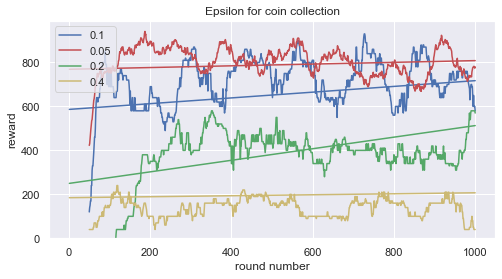

In [56]:
fig, ax1 = plt.subplots(1, figsize=(8,4))

ax1.set_title("Epsilon for coin collection")
ax1.plot(df.index, df['reward_avg'],  color="b")
ax1.plot(np.unique(df.index), np.poly1d(np.polyfit(df.index, df['total rewards'], 1))(np.unique(df.index)), label="0.1", color="b")
ax1.plot(df2.index, df2['reward_avg'], color="r")
ax1.plot(np.unique(df2.index), np.poly1d(np.polyfit(df2.index, df2['total rewards'], 1))(np.unique(df2.index)), label="0.05", color="r")
ax1.plot(df3.index, df3['reward_avg'], color="g")
ax1.plot(np.unique(df3.index), np.poly1d(np.polyfit(df3.index, df3['total rewards'], 1))(np.unique(df3.index)), label="0.2", color="g")
ax1.plot(df4.index, df4['reward_avg'], color="y")
ax1.plot(np.unique(df4.index), np.poly1d(np.polyfit(df4.index, df4['total rewards'], 1))(np.unique(df4.index)), label="0.4", color="y")
ax1.set_ylim(ymin=0)


ax1.set_xlabel("round number")
ax1.set_ylabel("reward")

ax1.legend(loc="upper left")

plt.show()

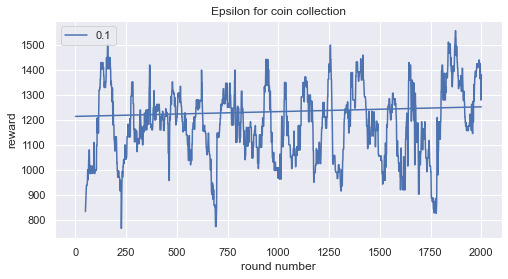

In [5]:
fig, ax1 = plt.subplots(1, figsize=(8,4))

ax1.set_title("Epsilon for coin collection")
ax1.plot(df.index, df['reward_avg'],  color="b")
ax1.plot(np.unique(df.index), np.poly1d(np.polyfit(df.index, df['total rewards'], 1))(np.unique(df.index)), label="0.1", color="b")
# ax1.plot(df2.index, df2['reward_avg'], color="r")
# ax1.plot(np.unique(df2.index), np.poly1d(np.polyfit(df2.index, df2['total rewards'], 1))(np.unique(df2.index)), label="0.05", color="r")
# ax1.plot(df3.index, df3['reward_avg'], color="g")
# ax1.plot(np.unique(df3.index), np.poly1d(np.polyfit(df3.index, df3['total rewards'], 1))(np.unique(df3.index)), label="0.2", color="g")
# ax1.plot(df4.index, df4['reward_avg'], color="y")
# ax1.plot(np.unique(df4.index), np.poly1d(np.polyfit(df4.index, df4['total rewards'], 1))(np.unique(df4.index)), label="0.4", color="y")
# ax1.set_ylim(ymin=0)


ax1.set_xlabel("round number")
ax1.set_ylabel("reward")

ax1.legend(loc="upper left")

plt.show()

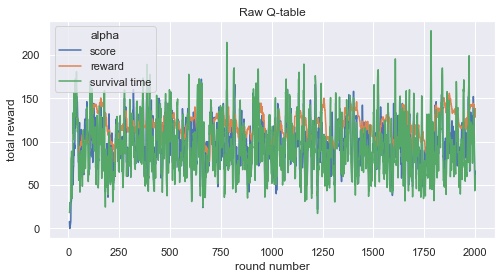

In [4]:
fig, ax1 = plt.subplots(1, figsize=(8,4))
ax1.set_title("Raw Q-table")
ax1.plot(df.index, df['score_avg']*10, label="score")
ax1.plot(df.index, df['reward_avg']/10, label="reward")
ax1.plot(df.index, df['st_avg'],  label="survival time")

ax1.set_xlabel("round number")
ax1.set_ylabel("total reward")

ax1.legend(title="alpha", loc="upper left")

plt.show()

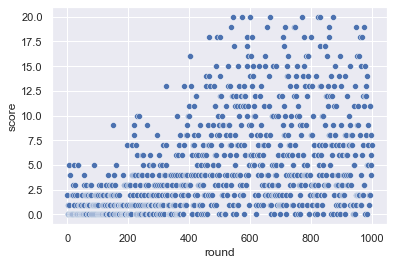

In [465]:
ax = sns.scatterplot(data=df3.score)

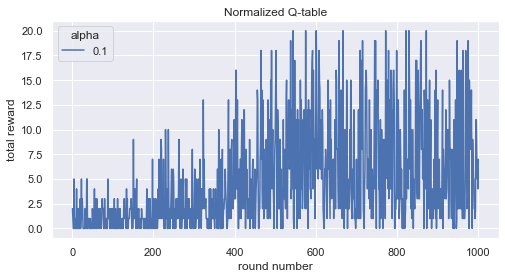

In [479]:
fig, ax1 = plt.subplots(1, figsize=(8,4))
ax1.set_title("Normalized Q-table")
# ax1.plot(df.index, df['reward_avg'], label="0.01")
# ax1.plot(df2.index, df2['reward_avg'], label="0.05")
ax1.plot(df3.index, df3['score'],  label="0.1")

ax1.set_xlabel("round number")
ax1.set_ylabel("total reward")

ax1.legend(title="alpha", loc="upper left")

plt.show()

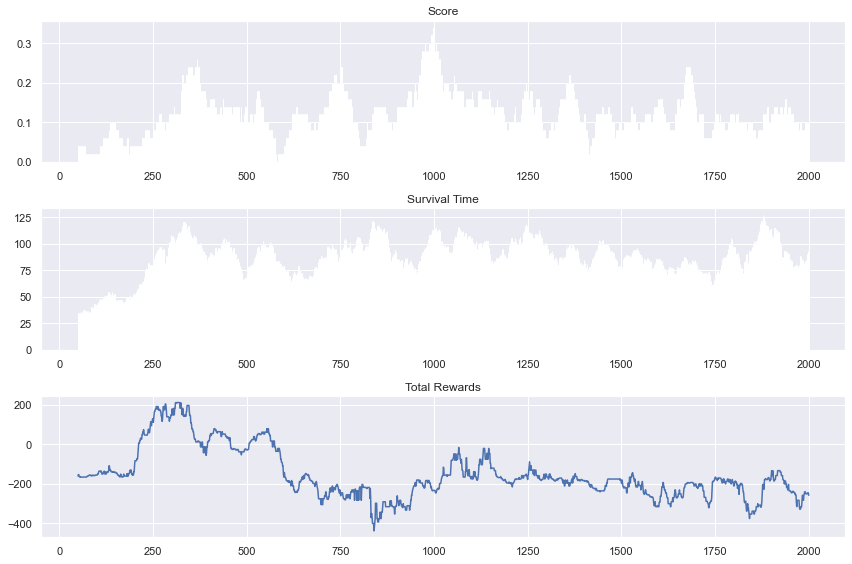

In [480]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,8))
ax1.bar(df.index, df['score_avg'])
ax2.bar(df.index, df['st_avg'])
ax3.plot(df.index, df['reward_avg'])

ax1.set_title("Score")
ax2.set_title("Survival Time")
ax3.set_title("Total Rewards")

fig.tight_layout() 

plt.show()

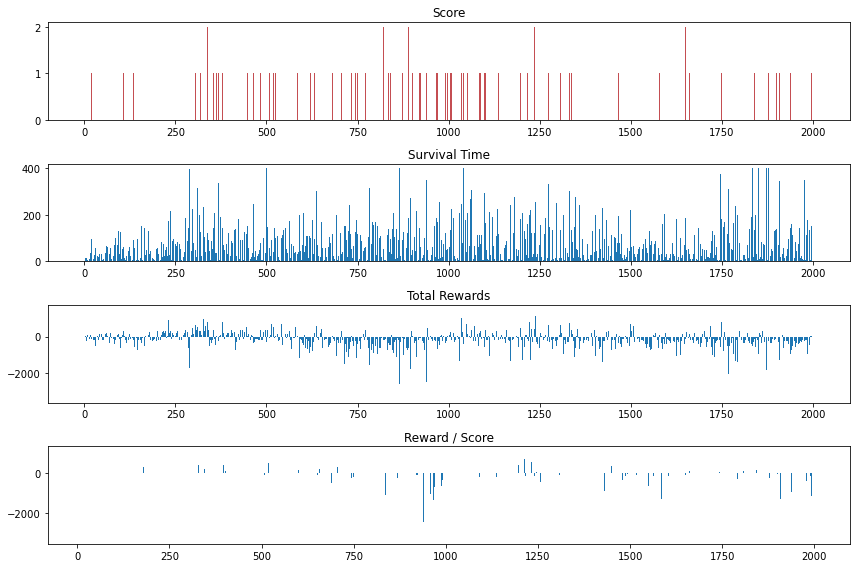

In [481]:
sns.reset_orig()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12,8))

ax1.bar(df.index, df['score'], color="r")
ax2.bar(df.index, df['survival time'])
ax3.bar(df.index, df['total rewards'])
ax4.bar(df.index, df['raw/score'])

ax1.set_title("Score")

ax2.set_title("Survival Time")
ax3.set_title("Total Rewards")
ax4.set_title("Reward / Score")

fig.tight_layout() 

plt.show()
